## **Downloading The Dataset**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import scipy as sc
from numpy import linalg


imgs = []                                                                  
drive.mount('/content/drive', force_remount=True)

for character in range (1,41):                                                  
  for image in range (1,11):                                                    
    Path = '/content/drive/My Drive/FaceRecognition/s'+ str(character) +'/'     
    Img = mpimg.imread(Path + str(image) + '.pgm')                              
    Vector = np.array(Img).reshape(10304)                                       
    imgs.append(Vector)                                                 

Mounted at /content/drive


# **Generating the Data Matrix and the Label vector**

In [ ]:
D = np.arange(400*10304).reshape(400,10304)
label_y = []
counter = 0
for i in range(len(D)):
  D[i] = np.array(imgs[i]).flatten()
  if(i%10 == 0):
    counter += 1
    label_y.append(counter)
  else:
    label_y.append(counter)

# **Splitting the Dataset into Training and Test sets**

In [ ]:
train_set = np.arange(200*10304).reshape(200,10304)
test_set = np.arange(200*10304).reshape(200,10304)

label_y_train = []
label_y_test = []
j = 0
k = 0
for i in range(len(D)):
  
  if(i%2 == 0):
    test_set[j] = D[i]
    label_y_test.append(label_y[i])
    j += 1
  else:
    train_set[k] = D[i]
    label_y_train.append(label_y[i])
    k += 1

# **Classification using PCA**

In [ ]:
def Reduced_Dimension(eigenvalues,alpha):

  
  sum_eigenvalues = np.sum(eigenvalues)
  sum = 0
  counter = 0
  while (sum/sum_eigenvalues) < alpha:
    sum += eigenvalues[counter]             
    counter += 1

  return counter

In [ ]:
Alpha = [0.8,0.85,0.9,0.95]
def PCA (train_set,test_set):
  mean_train = np.mean(train_set,axis=0)
  mean_test = np.mean(test_set,axis=0)
  centered_data_train = train_set - mean_train
  centered_data_test = test_set - mean_test

  covariance_train =np.cov(centered_data_train, rowvar=False, bias=True)


  eigenvalues_train, eigenvectors_train = np.linalg.eigh(covariance_train) #symmetric

  eigenvalues_train = np.flip(eigenvalues_train,axis=0) 
  eigenvectors_train = np.flip(eigenvectors_train,axis=1) 
  
  return centered_data_train,centered_data_test,eigenvalues_train,eigenvectors_train

In [ ]:
def projection(eigenvalues_train,eigenvectors_train,centered_data_train,centered_data_test,Alpha):  
  
  r = Reduced_Dimension(eigenvalues_train,Alpha)  # send one alpha
  
  projection_matrix = eigenvectors_train[:,0:r]
  reduced_dimension_train = (projection_matrix.transpose() @ centered_data_train.transpose())
  reduced_dimension_test = (projection_matrix.transpose() @ centered_data_test.transpose())

  return reduced_dimension_train,reduced_dimension_test


# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
                                                       
# K_Neighbours Function
def k_Neigh(K, Train, Test, TestLabel, Alpha, TrainLabel,number_of_classes):
   model = KNeighborsClassifier(n_neighbors= K)                                 
   FitModel = model.fit(Train, TrainLabel)                                          
   Predictions = model.predict(Test)                                                   
   Accuracy = accuracy_score(TestLabel, Predictions)
   if (Alpha >0):                           
     print("For Alpha = ", Alpha,"\t With ", K, " Neighbours", "\t The Accuracy Will be = ", Accuracy)
   elif (Alpha==0):
     
     print("For ",K,"Neighbours", "\t The Accuracy Will be = ", Accuracy)
   if (number_of_classes ==2):
    print(" NORMALIZED CONFUSION MATRIX\n")
    cm=metrics.confusion_matrix(TestLabel, Predictions,labels=[1, 2])
    cmn = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 7))
    cmt = pd.DataFrame(cmn,index=['true:faces', 'true:non faces'], 
    columns=['pred:faces', 'pred:non faces'])    
    sns.heatmap(cmt, annot=True, fmt='.2f', xticklabels=['pred:faces', 'pred:non faces'],yticklabels=['true:faces', 'true:non faces'])
    plt.show()       
   return Accuracy

# **Classifier Tuning For PCA**

In [ ]:
centered_data_train,centered_data_test,eigenvalues_train,eigenvectors_train = PCA(train_set,test_set)

for i in range(len(Alpha)):
  reduced_dimension_train,reduced_dimension_test = projection(eigenvalues_train,eigenvectors_train,centered_data_train,centered_data_test,Alpha[i])
  k_Neigh(1,reduced_dimension_train.T,reduced_dimension_test.T,label_y_test,Alpha[i],label_y_train,40)
  k_Neigh(3,reduced_dimension_train.T,reduced_dimension_test.T,label_y_test,Alpha[i],label_y_train,40)
  k_Neigh(5,reduced_dimension_train.T,reduced_dimension_test.T,label_y_test,Alpha[i],label_y_train,40)
  k_Neigh(7,reduced_dimension_train.T,reduced_dimension_test.T,label_y_test,Alpha[i],label_y_train,40)

For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.93
For Alpha =  0.8 	 With  3  Neighbours 	 The Accuracy Will be =  0.85
For Alpha =  0.8 	 With  5  Neighbours 	 The Accuracy Will be =  0.82
For Alpha =  0.8 	 With  7  Neighbours 	 The Accuracy Will be =  0.78
For Alpha =  0.85 	 With  1  Neighbours 	 The Accuracy Will be =  0.935
For Alpha =  0.85 	 With  3  Neighbours 	 The Accuracy Will be =  0.855
For Alpha =  0.85 	 With  5  Neighbours 	 The Accuracy Will be =  0.835
For Alpha =  0.85 	 With  7  Neighbours 	 The Accuracy Will be =  0.77
For Alpha =  0.9 	 With  1  Neighbours 	 The Accuracy Will be =  0.94
For Alpha =  0.9 	 With  3  Neighbours 	 The Accuracy Will be =  0.845
For Alpha =  0.9 	 With  5  Neighbours 	 The Accuracy Will be =  0.815
For Alpha =  0.9 	 With  7  Neighbours 	 The Accuracy Will be =  0.75
For Alpha =  0.95 	 With  1  Neighbours 	 The Accuracy Will be =  0.935
For Alpha =  0.95 	 With  3  Neighbours 	 The Accuracy Will be =  0.85
For Alph

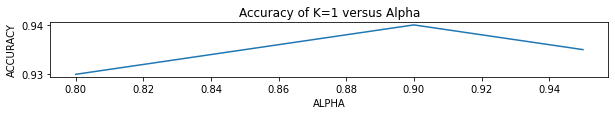

In [ ]:
plt.plot([0.8,0.85,0.9,0.95],[0.93,0.935,0.94,0.935]);
plt.title('Accuracy of K=1 versus Alpha');
plt.gcf().set_size_inches(10,1);
plt.xlabel('ALPHA');
plt.ylabel('ACCURACY');

# **Classification Using LDA**

In [ ]:
List_of_classes=[]
List_of_means=[]
for i in range(1,202):
    if(i%5==0):
        List_of_classes.append(train_set[i-5:i,:])
        
for i in range(0,40):
  List_of_means.append(np.mean(List_of_classes[i], axis=0)) #compute the mean across the columns of the 5 rows of each class, produces Matrix of size (10304 x 1)


In [ ]:
Overall_mean = np.mean(train_set, axis=0)
print("The overall mean is a matrix of size (10304 x 1)")
print(Overall_mean)

The overall mean is a matrix of size (10304 x 1)
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]


In [ ]:
B = np.zeros((10304,10304))
Array = np.array(List_of_means)

for i in range(0,40):
  B += 5*np.outer((Array[i]-Overall_mean),(Array[i]-Overall_mean).T)
  
print(B)

[[235278.32  232717.44  233560.64  ... -43174.56  -21703.44  -15646.88 ]
 [232717.44  230668.78  231142.03  ... -40923.52  -20191.43  -14642.46 ]
 [233560.64  231142.03  232523.155 ... -39926.72  -18941.855 -13273.41 ]
 ...
 [-43174.56  -40923.52  -39926.72  ... 360976.48  315665.12  312321.04 ]
 [-21703.44  -20191.43  -18941.855 ... 315665.12  294892.955 289157.81 ]
 [-15646.88  -14642.46  -13273.41  ... 312321.04  289157.81  289627.82 ]]


In [ ]:
withinclassScatter = np.zeros((10304,10304))
for i in range(0,40):
    withinclassScatter += np.dot((List_of_classes[i] - Array[i]).T,List_of_classes[i] - Array[i])

print(withinclassScatter)

[[ 28496.8  27128.2  27372.4 ...  -3977.2  -3511.6    539. ]
 [ 27128.2  28448.8  27518.6 ...  -2697.2  -2349.2   1781.6]
 [ 27372.4  27518.6  28698.4 ...  -3472.2   -923.2   3416.2]
 ...
 [ -3977.2  -2697.2  -3472.2 ... 140034.   83425.8  64222.2]
 [ -3511.6  -2349.2   -923.2 ...  83425.8  99585.6  82754.4]
 [   539.    1781.6   3416.2 ...  64222.2  82754.4 104148.8]]


In [ ]:
inv_WithinClassScatter = sc.linalg.pinvh(withinclassScatter)
eigen_values,eigen_vectors = np.linalg.eigh(np.dot(inv_WithinClassScatter,B))

print("eigen vectors")
print(eigen_vectors)

eigen vectors
[[ 0.00201327 -0.01488493  0.0169673  ... -0.01464629  0.01778491
  -0.00309042]
 [ 0.00201144 -0.01458636  0.01705736 ... -0.01483298  0.01743708
  -0.00307351]
 [ 0.00171153 -0.0147627   0.01672045 ... -0.01469255  0.01763276
  -0.00278525]
 ...
 [ 0.03200602 -0.0007549  -0.0182717  ... -0.03081825 -0.00588993
   0.02970223]
 [ 0.01512778 -0.00340697 -0.01494218 ... -0.03216602 -0.01001873
   0.01634163]
 [ 0.03701944 -0.01067216 -0.00672789 ... -0.01829022 -0.01345548
   0.033857  ]]


In [ ]:
centered_data_train = train_set - Overall_mean
centered_data_test = test_set - test_set.mean(axis=0)
idx = eigen_values.argsort()[-39:][::-1]
sortedEigVectMatrixLDA = np.real(eigen_vectors[:,idx])
reduced_dimension_train = np.dot(centered_data_train,sortedEigVectMatrixLDA)
reduced_dimension_test = np.dot( centered_data_test,sortedEigVectMatrixLDA)

# **Classifier Tuning For LDA**

In [ ]:
k_Neigh(1,reduced_dimension_train,reduced_dimension_test,label_y_test,0,label_y_train,40)
k_Neigh(3,reduced_dimension_train,reduced_dimension_test,label_y_test,0,label_y_train,40)
k_Neigh(5,reduced_dimension_train,reduced_dimension_test,label_y_test,0,label_y_train,40)
k_Neigh(7,reduced_dimension_train,reduced_dimension_test,label_y_test,0,label_y_train,40)

For  1 Neighbours 	 The Accuracy Will be =  0.95
For  3 Neighbours 	 The Accuracy Will be =  0.88
For  5 Neighbours 	 The Accuracy Will be =  0.865
For  7 Neighbours 	 The Accuracy Will be =  0.85


0.85

# **Faces vs Non-Faces**
### **Downloading Dataset**

In [ ]:
#reading non-face images
import cv2
Imgs_2 = []

for i in range (1,4001):                                                                                            
  Path = '/content/drive/My Drive/dog/'           
  non_Img = cv2.imread(Path+'pic ('+str(i)+').jpg',0)    # transforming to grayscale
  resized = cv2.resize(non_Img,(92,112))                   
  vector = resized.flatten()  
  Imgs_2.append(vector)

### **Splitting Faces And Non-Faces**

In [ ]:
matrix_fnf = np.arange(4200*10304).reshape(4200,10304) # matrix of faces and non faces(4000)
label_fnf= []

for i in range(0,200):
  matrix_fnf[i]=D[i]
  label_fnf.append(1)

k=0
for j in range(200,4200):
  matrix_fnf[j]=np.array(Imgs_2[k])
  k+=1 
  label_fnf.append(2)


In [ ]:
def train_test_split(num_nonFaces):    # takes the number of non-faces without changing number of faces


  new_train_set = np.arange((100+num_nonFaces//2)*10304).reshape((100+num_nonFaces//2),10304)
  new_test_set = np.arange((100+num_nonFaces//2)*10304).reshape((100+num_nonFaces//2),10304)

  label_fnf_train = []
  label_fnf_test = []
  j = 0
  k = 0
  m = 100
  n = 100
  for i in range(0,200):   
    if (i%2 == 0):
      new_test_set[j] = matrix_fnf[i]
      label_fnf_test.append(1)
      j += 1
    else:
      new_train_set[k] = matrix_fnf[i]
      label_fnf_train.append(1)
      k += 1
  for l in range(200,(200+num_nonFaces)): 

    if (l%2 == 0):
      new_test_set[m] = matrix_fnf[l]
      label_fnf_test.append(2)      ## 1 for faces 2 for non faces
      m += 1
    else:
      new_train_set[n] = matrix_fnf[l]
      label_fnf_train.append(2)
      n += 1   
  return new_test_set,new_train_set,label_fnf_train,label_fnf_test

### **Classification Using PCA**

For the following range of non-faces in the training set  50 :
For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.9266666666666666
 NORMALIZED CONFUSION MATRIX



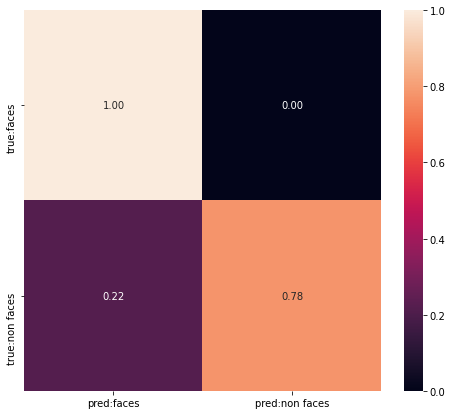

For the following range of non-faces in the training set  200 :
For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.92
 NORMALIZED CONFUSION MATRIX



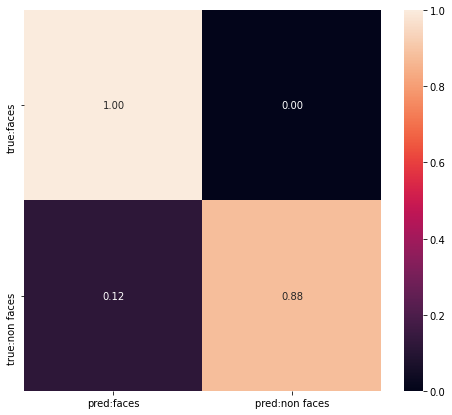

For the following range of non-faces in the training set  500 :
For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.9316666666666666
 NORMALIZED CONFUSION MATRIX



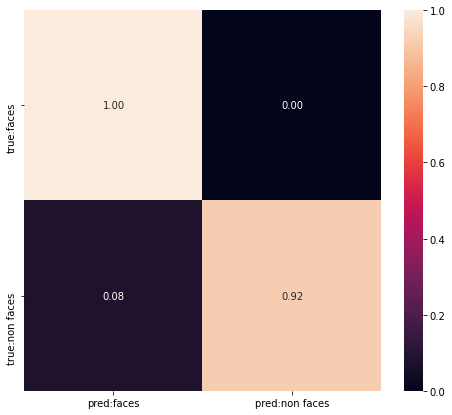

For the following range of non-faces in the training set  1000 :
For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.9590909090909091
 NORMALIZED CONFUSION MATRIX



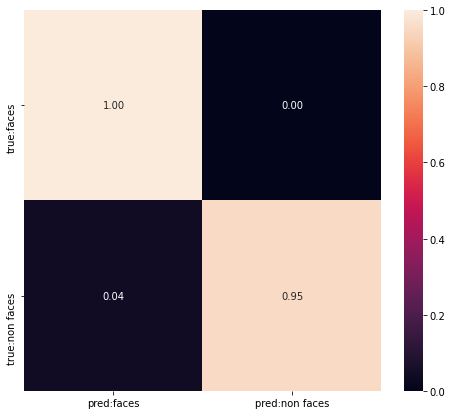

For the following range of non-faces in the training set  2000 :
For Alpha =  0.8 	 With  1  Neighbours 	 The Accuracy Will be =  0.9728571428571429
 NORMALIZED CONFUSION MATRIX



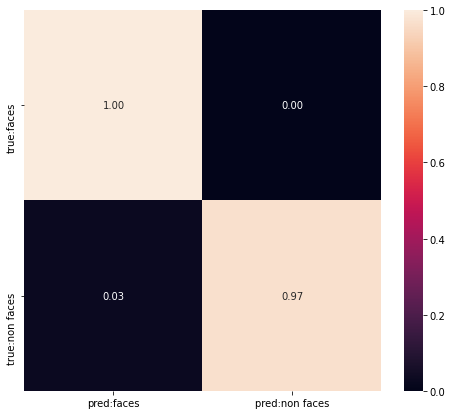

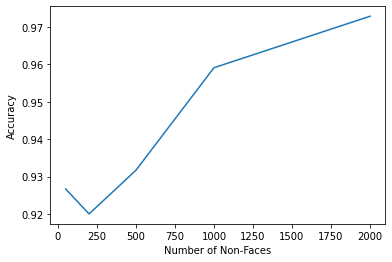

In [ ]:
# different non- face values for fixed number of faces(imbalanced classification)

ranges=[100,400,1000,2000,4000]
array=[]
for j in range(len(ranges)):
  print('For the following range of non-faces in the training set ',ranges[j]//2,':')
  #ratios in training dataset (2:1),(1:2),(1:5),(1:10),(1:20)
  new_test_set,new_train_set,label_fnf_train,label_fnf_test=train_test_split(ranges[j]) 
  new_centered_data_train,new_centered_data_test,new_eigenvalues_train,new_eigenvectors_train = PCA(new_train_set,new_test_set)
  new_reduced_dimension_train,new_reduced_dimension_test = projection(new_eigenvalues_train,new_eigenvectors_train,new_centered_data_train,new_centered_data_test,0.8)
  accuracy=k_Neigh(1,new_reduced_dimension_train.T,new_reduced_dimension_test.T,label_fnf_test,0.8,label_fnf_train,2)
  array.append(accuracy)
  
for j in range(len(ranges)):
  ranges[j]=ranges[j]/2

plt.plot(ranges,array) 
plt.xlabel("Number of Non-Faces")
plt.ylabel("Accuracy")
plt.show()     



### **Classification Using LDA**

For the following range of non-faces in the training set  50 :
For  1 Neighbours 	 The Accuracy Will be =  0.9733333333333334
 NORMALIZED CONFUSION MATRIX



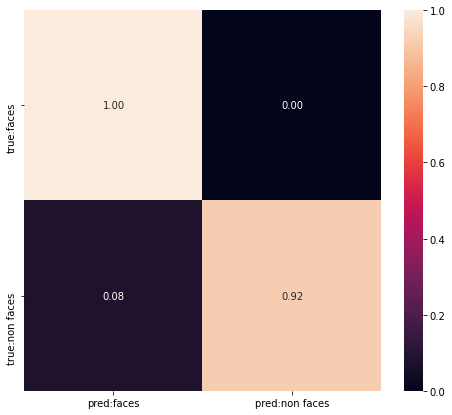

For the following range of non-faces in the training set  200 :
For  1 Neighbours 	 The Accuracy Will be =  0.95
 NORMALIZED CONFUSION MATRIX



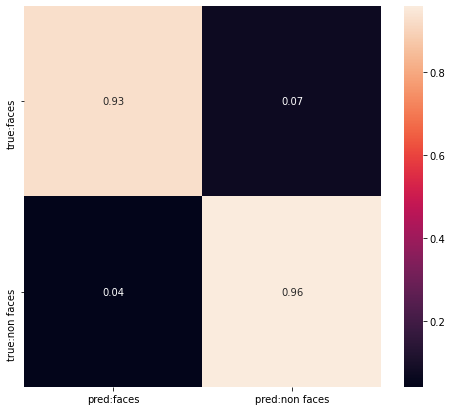

For the following range of non-faces in the training set  500 :
For  1 Neighbours 	 The Accuracy Will be =  0.9433333333333334
 NORMALIZED CONFUSION MATRIX



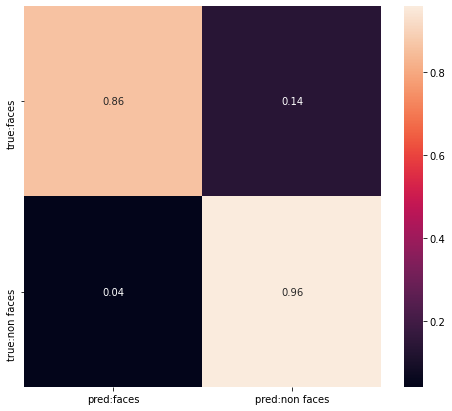

For the following range of non-faces in the training set  1000 :
For  1 Neighbours 	 The Accuracy Will be =  0.9590909090909091
 NORMALIZED CONFUSION MATRIX



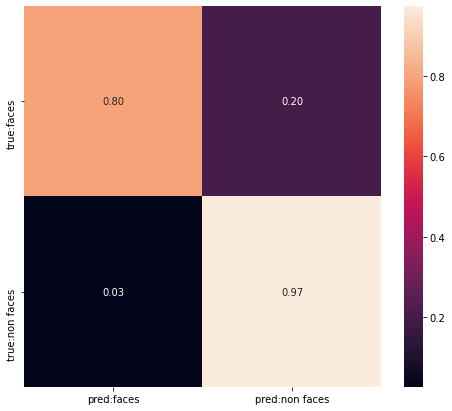

For the following range of non-faces in the training set  2000 :
For  1 Neighbours 	 The Accuracy Will be =  0.9695238095238096
 NORMALIZED CONFUSION MATRIX



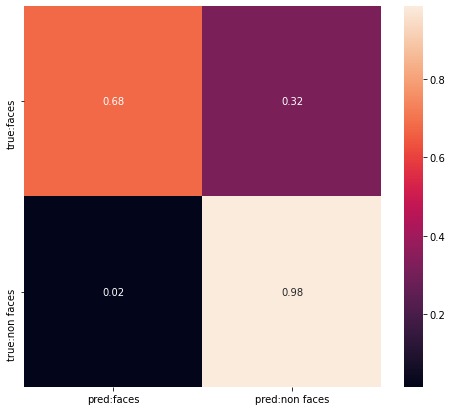

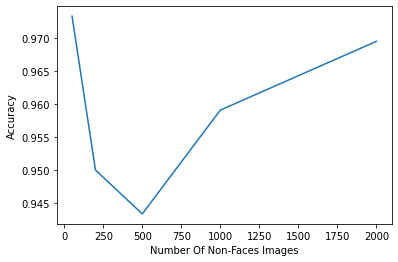

In [ ]:
ranges=[100,400,1000,2000,4000] 
List_of_classes=[]
List_of_means=[]
Accuracy = []
for j in range(len(ranges)):
  print('For the following range of non-faces in the training set ',ranges[j]//2,':')
  #ratios in training dataset (2:1),(1:1),(1:2),(1:5),(1:10) (slight imbalance and severe imbalance) 

  new_test_set,new_train_set,label_fnf_train,label_fnf_test=train_test_split(ranges[j]) 
  List_of_classes.append(new_train_set[0:100,:])                                          # first 100 are faces label = 1
  List_of_classes.append(new_train_set[100:len(new_train_set),:])                         # the rest are nonfaces label = 2
                                                                                      
  List_of_means.append(np.mean(List_of_classes[0],axis=0))
  List_of_means.append(np.mean(List_of_classes[1],axis=0))

  B = np.zeros((10304,10304))
  Array_mean = np.array(List_of_means)
  B = np.outer((Array_mean[0]-Array_mean[1]),(Array_mean[0]-Array_mean[1]).T)

  withinclassScatter = np.zeros((10304,10304))
  for i in range(0,2):
      withinclassScatter += np.dot((List_of_classes[i] - Array_mean[i]).T,List_of_classes[i] - Array_mean[i])

  inv_WithinClassScatter =  sc.linalg.pinvh(withinclassScatter)

  linearDiscriminant=inv_WithinClassScatter @ (Array_mean[0]-Array_mean[1])
  linearDiscriminant=linearDiscriminant/np.linalg.norm(linearDiscriminant)


  reduced_dimension_train = linearDiscriminant.T @ new_train_set.T
  reduced_dimension_test = linearDiscriminant.T @ new_test_set.T
  
  acc = k_Neigh(1,reduced_dimension_train.T.reshape(-1,1),reduced_dimension_test.T.reshape(-1,1),label_fnf_test,0,label_fnf_train,2)
  Accuracy.append(acc)

for j in range(len(ranges)):
  ranges[j]=ranges[j]/2  
plt.plot(ranges,Accuracy)   

plt.xlabel("Number Of Non-Faces Images")
plt.ylabel("Accuracy")
plt.show()

# **Bonus**
### **New Data Split [70:30]**

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(D, label_y, test_size=0.3)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape )


(280, 10304) (120, 10304)
(280,) (120,)


### **Classification Using PCA**

In [ ]:
centered_data_train,centered_data_test,eigenvalues_train,eigenvectors_train = PCA(X_train,X_test)
reduced_dimension_train,reduced_dimension_test = projection(eigenvalues_train,eigenvectors_train,centered_data_train,centered_data_test,0.9)
k_Neigh(1,reduced_dimension_train.T,reduced_dimension_test.T,y_test,0.9,y_train,40)


For Alpha =  0.9 	 With  1  Neighbours 	 The Accuracy Will be =  0.9333333333333333


0.9333333333333333

### **Classification Using LDA**

In [ ]:
List_of_classes=[]
List_of_means=[]
for i in range(1,282):
    if(i%5==0):
        List_of_classes.append(X_train[i-5:i,:])
        
for i in range(0,56):
  List_of_means.append(np.mean(List_of_classes[i], axis=0)) #compute the mean across the columns of the 5 rows of each class, produces Matrix of size (10304 x 1)

Overall_mean = np.mean(X_train, axis=0)

B = np.zeros((10304,10304))
Array = np.array(List_of_means)

for i in range(0,56):
  B += 5*np.outer((Array[i]-Overall_mean),(Array[i]-Overall_mean).T)


withinclassScatter = np.zeros((10304,10304))
for i in range(0,56):
    withinclassScatter += np.dot((List_of_classes[i] - Array[i]).T,List_of_classes[i] - Array[i])



inv_WithinClassScatter = sc.linalg.pinvh(withinclassScatter)
eigen_values,eigen_vectors = np.linalg.eigh(np.dot(inv_WithinClassScatter,B))


centered_data_train = X_train - Overall_mean
centered_data_test = X_test - X_test.mean(axis=0)
idx = eigen_values.argsort()[-39:][::-1]
sortedEigVectMatrixLDA = np.real(eigen_vectors[:,idx])
reduced_dimension_train = np.dot(centered_data_train,sortedEigVectMatrixLDA)
reduced_dimension_test = np.dot( centered_data_test,sortedEigVectMatrixLDA)

k_Neigh(1,reduced_dimension_train,reduced_dimension_test,y_test,0,y_train,40)

For  1 Neighbours 	 The Accuracy Will be =  0.8833333333333333


0.8833333333333333